In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
bc=load_breast_cancer()

In [4]:
x=bc.data
y=bc.target

In [125]:
print(x.shape)
y.shape

(569, 30)


(569,)

In [109]:
df=pd.DataFrame(x,columns=bc.feature_names)
df['target']=pd.Series(y)

In [127]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [132]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [126]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
print(x.shape)
y.shape

(569, 30)


(569,)

In [8]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)

In [10]:
#Classification Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()

In [72]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [73]:
pred=knn.predict(xtest)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
test_sc=accuracy_score(ytest,pred)

In [76]:
train_sc=accuracy_score(ytrain,knn.predict(xtrain))

In [77]:
print("Accuracy score for training data is:",train_sc)
print("Accuracy score for test data is:    ",test_sc)

Accuracy score for training data is: 0.9406593406593406
Accuracy score for test data is:     0.9385964912280702


In [22]:
#Classification using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [114]:
log=LogisticRegression(max_iter=10000)

In [115]:
log.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [116]:
pred1=log.predict(xtest)

In [117]:
train_score=accuracy_score(ytrain,log.predict(xtrain))
test_score=accuracy_score(ytest,pred1)

In [118]:
print("Accuracy score for training data is:",train_score)
print("Accuracy score for test data is    :",test_score)

Accuracy score for training data is: 0.9626373626373627
Accuracy score for test data is    : 0.9473684210526315


In [129]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [131]:
recall_score(ytest,pred)

0.958904109589041

In [130]:
precision_score(ytest,pred)

0.9459459459459459

<BarContainer object of 4 artists>

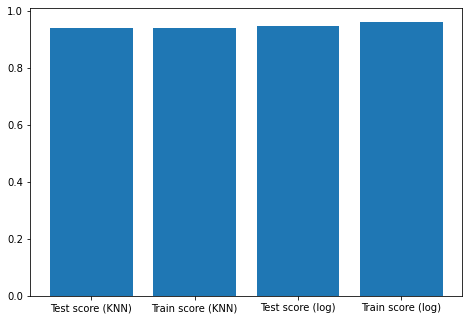

In [123]:
bar=plt.figure()
ax=bar.add_axes([0,0,1,1])
x_axis=['Test score (KNN)','Train score (KNN)','Test score (log)','Train score (log)']
y_axis=[test_sc,train_sc,test_score,train_score]
ax.bar(x_axis,y_axis)